In [2]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate



In [3]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [4]:
os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/CMIP5/bromeliad/ \
/Users/earl/Desktop/Demeter')

256

In [5]:
with open('p05_index_and_pools.pkl', 'rb') as f:
    lat_warmN, lat_warmS, lon_warmW, lon_warmE, \
    SAM_index_sorted_cleaned, warm_pool_sorted_cleaned, wind_pool_sorted_cleaned = \
    pickle.load(f)

print(SAM_index_sorted_cleaned)

['IPSL-CM5A-MR', 'IPSL-CM5A-LR', 'GFDL-CM3', 'FGOALS-s2', 'CMCC-CMS', 'CMCC-CM', 'MIROC-ESM', 'MPI-ESM-MR', 'GFDL-ESM2M', 'CanESM2', 'MIROC-ESM-CHEM', 'ACCESS1-0', 'GFDL-ESM2G', 'HadGEM2-AO', 'ACCESS1-3', 'CSIRO-Mk3-6-0', 'MRI-ESM1', 'NorESM1-M', 'MRI-CGCM3', 'NorESM1-ME', 'FIO-ESM', 'CNRM-CM5', 'IPSL-CM5B-LR']


In [6]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'


hist_data_path = '/Users/earl/Desktop/Demeter/historical/'
hist_tos_path = hist_data_path + 'mon/ocean/r1i1p1/tos/latest/'
hist_tauuo_path = hist_data_path + 'mon/ocean/r1i1p1/tauuo/latest/'
hist_tos_list = sorted(os.listdir(hist_tos_path))
hist_tauuo_list = sorted(os.listdir(hist_tauuo_path))
#print(hist_models_list)


rcp85_data_path = '/Users/earl/Desktop/Demeter/rcp85/'
rcp85_tos_path = rcp85_data_path + 'mon/ocean/r1i1p1/tos/latest/'
rcp85_tauuo_path = rcp85_data_path + 'mon/ocean/r1i1p1/tauuo/latest/'
rcp85_tos_list = sorted(os.listdir(rcp85_tos_path))
rcp85_tauuo_list = sorted(os.listdir(rcp85_tauuo_path))
#print(rcp85_models_list)


p07_plot_GAB_vs_glob


In [7]:
tos_hist = {}
tos_rcp85 = {}
tos_anom = {}
tos_lat = {}
tos_lon = {}

tauuo_hist = {}
tauuo_rcp85 = {}
tauuo_anom = {}
tauuo_lat = {}
tauuo_lon = {}

plot_list = sorted(SAM_index_sorted_cleaned)
for model in plot_list:
    # These models are hard to deal with:
    # MIROC5 and inmcm4 have a crazy rotated grid
    # MPI-ESM-LR has a weird grid too
    if model in ['MIROC5', 'MPI-ESM-LR', 'inmcm4']:
        continue
    
    tos_hist_data = xr.open_dataset(hist_tos_path + model + '_1981-2000mean.nc')
    tos_rcp85_data = xr.open_dataset(rcp85_tos_path + model + '_2081-2100mean.nc')
    tos_hist[model] = tos_hist_data['tos'][0,:,:]
    tos_rcp85[model] = tos_rcp85_data['tos'][0,:,:]
    
    tauuo_hist_data = xr.open_dataset(hist_tauuo_path + model + '_1981-2000mean.nc')
    tauuo_rcp85_data = xr.open_dataset(rcp85_tauuo_path + model + '_2081-2100mean.nc')
    tauuo_hist[model] = tauuo_hist_data['tauuo'][0,:,:]
    tauuo_rcp85[model] = tauuo_rcp85_data['tauuo'][0,:,:]

    # MPI-ESM-LR has its lon cut-off over Australia
    if model in ['MPI-ESM-LR']:
        tos_hist_now = tos_hist[model]
        tos_hist[model] = tos_hist_now.roll(i=100)
        tos_rcp85_now = tos_rcp85[model]
        tos_rcp85[model] = tos_rcp85_now.roll(i=100)
        
        tauuo_hist_now = tauuo_hist[model]
        tauuo_hist[model] = tauuo_hist_now.roll(i=100)
        tauuo_rcp85_now = tauuo_rcp85[model]
        tauuo_rcp85[model] = tauuo_rcp85_now.roll(i=100)
    
    tos_anom[model] = tos_rcp85[model]-tos_hist[model]
    tauuo_anom[model] = tauuo_rcp85[model]-tauuo_hist[model]
    
    if len(tos_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            tos_lat[model] = tos_hist_data['lat'][:,0]
            tos_lon[model] = tos_hist_data['lon'][-1,:]
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][-1,:]
            print(model + ' OK!')
            
        else:
            tos_lat[model] = tos_hist_data['lat'][:,0]
            tos_lon[model] = tos_hist_data['lon'][0,:]
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][0,:]
            print(model + ' OK!')
        
    else:
        tos_lat[model] = tos_hist_data['lat'][:]
        tos_lon[model] = tos_hist_data['lon'][:]
        tauuo_lat[model] = tos_hist_data['lat'][:]
        tauuo_lon[model] = tos_hist_data['lon'][:]
        print(model + ' OK!')
    
    # The GFDL models run need this lon offset fix ...
    if model in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M']:
        tos_lon[model][0:100] += 360
        tauuo_lon[model][0:100] += 360
    
    # MPI-ESM-LR lon needs to be offset...
    if model in ['MPI-ESM-LR']:
        tos_lon[model] -= 180
        tauuo_lon[model] -= 180
    
    # Also, MPI-ESM-LR and MPI-ESM-MR are flipped upside down...
    # Couldn't find a flip function in xarray...
    if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
        tos_anom_now = tos_anom[model]
        tos_anom[model] = np.flipud(tos_anom_now)
        tauuo_anom_now = tauuo_anom[model]
        tauuo_anom[model] = np.flipud(tauuo_anom_now)
        
        tos_lat_now = tos_lat[model]
        tos_lat[model] = np.flipud(tos_lat_now)
        tauuo_lat_now = tauuo_lat[model]
        tauuo_lat[model] = np.flipud(tauuo_lat_now)
        
    # HadGEM2-AO, MRI-CGCM3 and MRI-ESM1 need to have their wind stress land masked...
    if model in ['HadGEM2-AO', 'MRI-CGCM3', 'MRI-ESM1']:
        # anything that satisfies the condition is SAFE
        tauuo_anom[model] = tauuo_anom[model].where((tauuo_anom[model] != 0), np.nan)
    
    # MRI-CGCM3 and MRI-ESM1 need to have their SST land masked...
    if model in ['MRI-CGCM3', 'MRI-ESM1']:
        tos_anom[model] = tos_anom[model].where((tos_anom[model] != 0), np.nan)
        
print(len(plot_list))   

ACCESS1-0 OK!
ACCESS1-3 OK!
CMCC-CM OK!
CMCC-CMS OK!
CNRM-CM5 OK!
CSIRO-Mk3-6-0 OK!
CanESM2 OK!
FGOALS-s2 OK!
FIO-ESM OK!
GFDL-CM3 OK!
GFDL-ESM2G OK!
GFDL-ESM2M OK!
HadGEM2-AO OK!
IPSL-CM5A-LR OK!
IPSL-CM5A-MR OK!
IPSL-CM5B-LR OK!
MIROC-ESM OK!
MIROC-ESM-CHEM OK!
MPI-ESM-MR OK!
MRI-CGCM3 OK!
MRI-ESM1 OK!
NorESM1-M OK!
NorESM1-ME OK!
23


In [18]:
# Calculate global SST anomaly:
global_MMM = {}
for model in SAM_index_sorted_cleaned:
    global_MMM[model] = np.nanmean(tos_anom[model])
    
print(global_MMM)

{'IPSL-CM5A-MR': 2.9238713, 'IPSL-CM5A-LR': 3.0115108, 'GFDL-CM3': 3.4371395, 'FGOALS-s2': 3.281168, 'CMCC-CMS': 2.7064049, 'CMCC-CM': 2.6062586, 'MIROC-ESM': 3.3803291, 'MPI-ESM-MR': 2.2764306, 'GFDL-ESM2M': 1.8202335, 'CanESM2': 3.0037251, 'MIROC-ESM-CHEM': 3.5852592, 'ACCESS1-0': 2.7222011, 'GFDL-ESM2G': 1.8162292, 'HadGEM2-AO': 2.9023163, 'ACCESS1-3': 2.7842751, 'CSIRO-Mk3-6-0': 2.7974329, 'MRI-ESM1': 2.6047022, 'NorESM1-M': 1.9923546, 'MRI-CGCM3': 2.1934483, 'NorESM1-ME': 2.1065075, 'FIO-ESM': 2.3301744, 'CNRM-CM5': 2.5539401, 'IPSL-CM5B-LR': 2.1853433}


[3.8531997, 3.5892086, 2.5441747, 4.1179905, 2.7116647, 2.3735912, 2.9135885, 2.0323305, 1.387588, 2.8168089, 2.8959525, 2.2436097, 1.480348, 2.3380773, 2.2334461, 2.3569658, 1.954566, 2.1240151, 1.7372552, 2.2576237, 2.977771, 2.2576282, 1.5453252]
[2.9238713, 3.0115108, 3.4371395, 3.281168, 2.7064049, 2.6062586, 3.3803291, 2.2764306, 1.8202335, 3.0037251, 3.5852592, 2.7222011, 1.8162292, 2.9023163, 2.7842751, 2.7974329, 2.6047022, 1.9923546, 2.1934483, 2.1065075, 2.3301744, 2.5539401, 2.1853433]


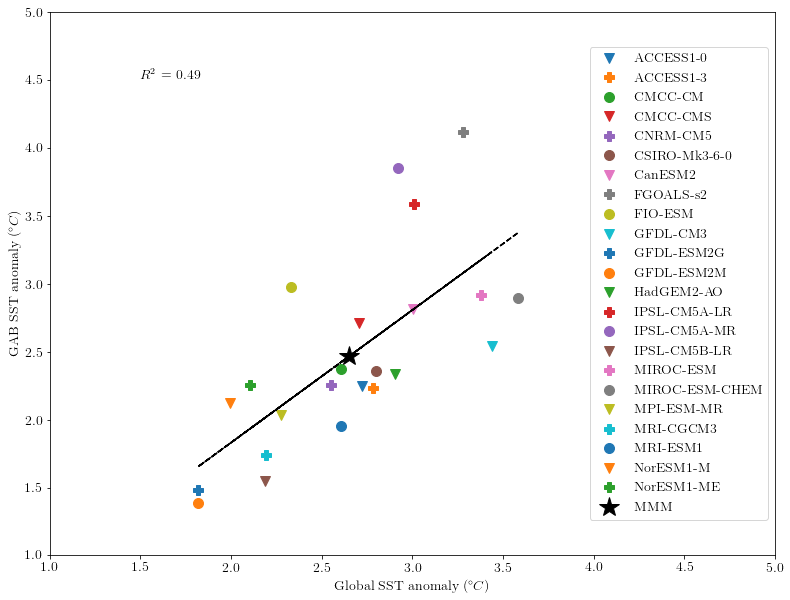

In [29]:
matplotlib.rcParams.update({'font.size': 14}) 
row = 1
col = 1
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(13, 10)
marker = itertools.cycle(('v', 'P', 'o')) 

ax = plt.subplot2grid((row, col), (0, 0))
for idx, t in enumerate(plot_list):    
    plt.plot(global_MMM[t] ,warm_pool_sorted_cleaned[t] , 
             marker = next(marker), markersize=10 ,linestyle='')

# lat_warmN_idx = find_nearest_index(lat_unique, lat_warmN)
# lat_warmS_idx = find_nearest_index(lat_unique, lat_warmS)
# lon_warmW_idx = find_nearest_index(lon_unique, lon_warmW)
# lon_warmE_idx = find_nearest_index(lon_unique, lon_warmE)

tos_global_MMM_values = list(global_MMM.values())
tos_anom_MMM_values = list(warm_pool_sorted_cleaned.values())
tos_global_MMM_values_mean = np.nanmean(tos_global_MMM_values)
tos_anom_MMM_values_mean = np.nanmean(tos_anom_MMM_values)

print(tos_anom_MMM_values)
print(tos_global_MMM_values)

plt.plot(tos_global_MMM_values_mean, tos_anom_MMM_values_mean ,
         marker = '*', markersize=20 ,linestyle='', color='k')

plot_list_legend = plot_list[:]
plot_list_legend.append('MMM')
plt.legend(plot_list_legend, loc='center right', bbox_to_anchor=(1.0, 0.5))

fit = np.polyfit(tos_global_MMM_values, tos_anom_MMM_values, 1)
fit_fn = np.poly1d(fit) 
plt.plot(tos_global_MMM_values, fit_fn(tos_global_MMM_values), '--k')
R2 = np.corrcoef(tos_global_MMM_values, tos_anom_MMM_values)[0, 1]**2
ax.text(1.5, 4.5, '$R^2$ = ' + str(np.round(R2*100)/100))

plt.xlabel('Global SST anomaly ($^{\circ}C$)')
plt.ylabel('GAB SST anomaly ($^{\circ}C$)')
plt.xlim([1, 5])
plt.ylim([1, 5])

# ax = plt.subplot2grid((row, col), (0, 1))
# cmap = plt.get_cmap('plasma')
# step = 0.2
# contf_lvls = np.arange(1.6,3.4+1e-08,step)               
# ax.set_facecolor('grey')
# contf = plt.contourf(lon_unique, lat_unique, tos_anom_MMM,
#                      contf_lvls, cmap=cmap, extend='both')
# plot = plt.plot(
#     [lon_warmW,lon_warmE,lon_warmE,lon_warmW,lon_warmW], 
#     [lat_warmS,lat_warmS,lat_warmN,lat_warmN,lat_warmS])
# ax.set_title('Multi model mean sea surface temperature anomaly')
# cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
# cbar.set_label(r'$SST anomaly$ $^{\circ}C$') 
# cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])

# ax = plt.subplot2grid((row, col), (1, 1))
# cmap = plt.get_cmap('seismic')
# step = 0.01
# contf_lvls = np.arange(-0.06,0.06+1e-08,step)               
# ax.set_facecolor('grey')
# contf = plt.contourf(lon_unique, lat_unique, tauuo_anom_MMM,
#                      contf_lvls, cmap=cmap, extend='both')
# plot = plt.plot(
#     [lon_warmW,lon_warmE,lon_warmE,lon_warmW,lon_warmW], 
#     [lat_warmS,lat_warmS,lat_warmN,lat_warmN,lat_warmS])
# ax.set_title('Multi model mean wind stress anomaly')
# cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
# cbar.set_label(r'$\tau$ $N/m^{2}$') 
# cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])


output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)

plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + '.png', bbox_inches='tight', dpi=200)